# 02b - Torus Skeletonization Demo

In [1]:
from discos import *
import trimesh
import numpy as np
import networkx as nx

## Create and Visualize Torus

In [2]:
# Create a torus mesh
torus = create_torus_mesh(major_radius=3.0, minor_radius=1.0, major_segments=24, minor_segments=12)

# Rotate so the torus lies on its side (ensures slices through the hole)
torus.apply_transform(trimesh.transformations.rotation_matrix(
    angle=np.pi / 2,
    direction=[1, 0, 0],
    point=torus.centroid
))

print(f"Torus properties:")
print(f"  Volume: {torus.volume:.3f}")
print(f"  Surface area: {torus.area:.3f}")
print(f"  Z-bounds: {torus.bounds[:, 2]}")

mm = MeshManager(torus)

# Visualize the original torus
fig = mm.visualize_mesh_3d(title="Original Torus", backend="plotly")
fig.show()

Torus properties:
  Volume: 58.461
  Surface area: 117.771
  Z-bounds: [-4.  4.]


## Skeletonization

C:\Users\MainUser\Documents\GitHub\discos\discos\skeleton.py:1099: UserWarning:

Approximate segment volume (18.8602) differs from mesh volume (58.4605) by 67.74%



[SkeletonGraph] Building 4 planes (including bounds) for n_slices=3
[SkeletonGraph] cut 0: 1 cross-section(s) at z=-3.99999
[SkeletonGraph] cut 1: 2 cross-section(s) at z=-1.33333
[SkeletonGraph] cut 2: 2 cross-section(s) at z=1.33333
[SkeletonGraph] cut 3: 1 cross-section(s) at z=3.99999
[SkeletonGraph] slice 0: lower cut 0 has 1 node(s), upper cut 1 has 2 node(s)
[SkeletonGraph] slice 0: edges made=0, pruned (no_conn=0, xy_gate=2, angle_gate=0)
[SkeletonGraph] slice 1: lower cut 1 has 2 node(s), upper cut 2 has 2 node(s)
[SkeletonGraph] slice 1: edges made=2, pruned (no_conn=2, xy_gate=0, angle_gate=0)
[SkeletonGraph] slice 2: lower cut 2 has 2 node(s), upper cut 3 has 1 node(s)
[SkeletonGraph] slice 2: edges made=0, pruned (no_conn=0, xy_gate=2, angle_gate=0)


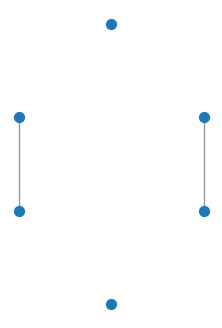

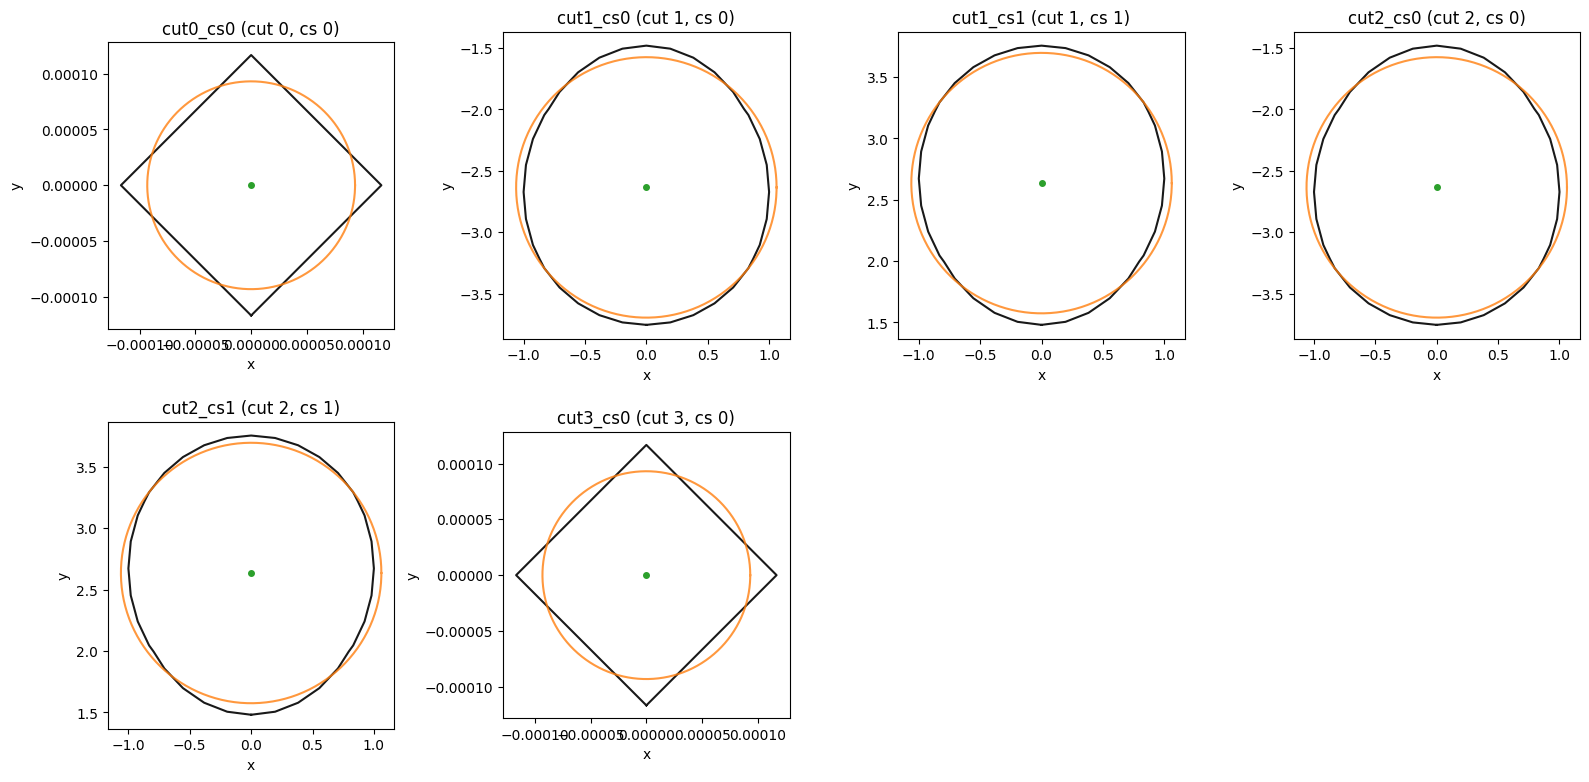

In [3]:
G = skeletonize(torus, n_slices=3, verbose=True)
G.draw(axis='y')
G.plot_all_cross_sections();

## Summary

The torus segmentation demonstrates:
- **Complex topology**: Middle slices contain multiple segments due to the hole
- **Ring connectivity**: Segments form a circular arrangement in 3D space
- **Genus = 1 handling**: Algorithm correctly identifies separate connected components within slices
- **Spatial relationships**: 3D visualization reveals the donut structure

This showcases the algorithm's ability to handle complex topologies with holes.